In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
california_housing = fetch_california_housing()

In [4]:
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

In [5]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
california_housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [8]:
X = data
y = california_housing.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Линейная регрессия

In [10]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred_lr = model_lr.predict(X_test)

In [12]:
from skimage.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_lr)

0.5291402345397314

In [13]:
model_lr.score(X_test, y_test)

0.5965968374812349

### Дерево решений

In [14]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [15]:
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [16]:
y_pred_dt = model_dt.predict(X_test)
mean_squared_error(y_test, y_pred_dt)

0.5012547266169817

In [17]:
model_dt.score(X_test, y_test)

0.617856045060232

[Text(0.5, 0.9, 'X[0] <= 5.124\nsquared_error = 1.336\nsamples = 16512\nvalue = 2.077'),
 Text(0.25, 0.7, 'X[0] <= 3.129\nsquared_error = 0.852\nsamples = 13221\nvalue = 1.756'),
 Text(0.125, 0.5, 'X[5] <= 2.159\nsquared_error = 0.581\nsamples = 6504\nvalue = 1.381'),
 Text(0.0625, 0.3, 'X[6] <= 37.945\nsquared_error = 1.127\nsamples = 971\nvalue = 1.934'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'X[6] <= 34.455\nsquared_error = 0.422\nsamples = 5533\nvalue = 1.284'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'X[5] <= 2.373\nsquared_error = 0.847\nsamples = 6717\nvalue = 2.119'),
 Text(0.3125, 0.3, 'X[1] <= 21.5\nsquared_error = 1.315\nsamples = 1539\nvalue = 2.838'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'X[0] <= 4.097\nsquared_error = 0.508\nsamples = 5178\nvalue = 1.905'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.468

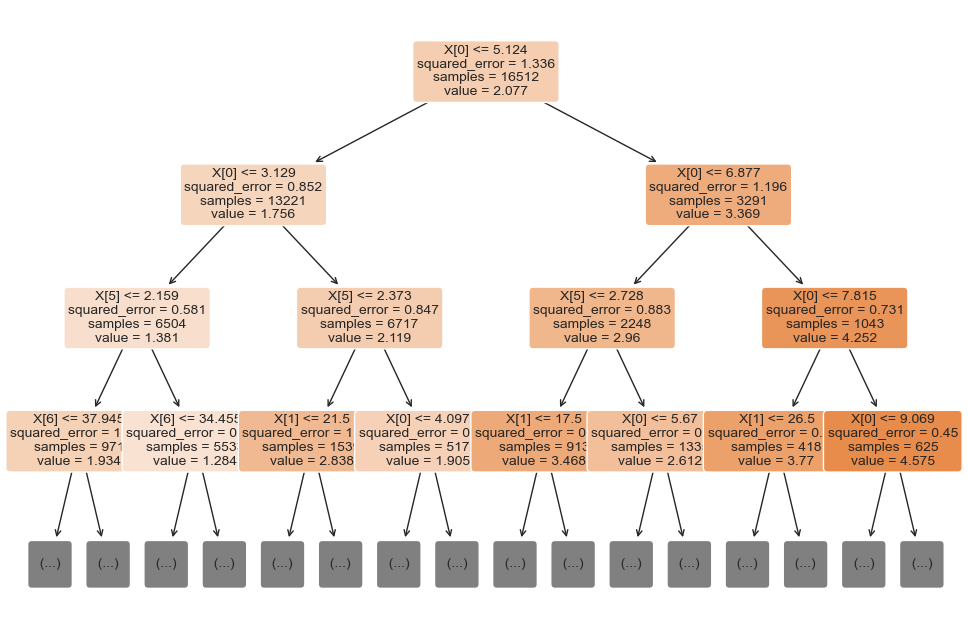

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model_dt, filled=True, rounded=True, fontsize=10, max_depth=3)

[Text(0.5, 0.9, 'MedInc <= 5.124\nsquared_error = 1.336\nsamples = 16512\nvalue = 2.077'),
 Text(0.25, 0.7, 'MedInc <= 3.129\nsquared_error = 0.852\nsamples = 13221\nvalue = 1.756'),
 Text(0.125, 0.5, 'AveOccup <= 2.159\nsquared_error = 0.581\nsamples = 6504\nvalue = 1.381'),
 Text(0.0625, 0.3, 'Latitude <= 37.945\nsquared_error = 1.127\nsamples = 971\nvalue = 1.934'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Latitude <= 34.455\nsquared_error = 0.422\nsamples = 5533\nvalue = 1.284'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'AveOccup <= 2.373\nsquared_error = 0.847\nsamples = 6717\nvalue = 2.119'),
 Text(0.3125, 0.3, 'HouseAge <= 21.5\nsquared_error = 1.315\nsamples = 1539\nvalue = 2.838'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'MedInc <= 4.097\nsquared_error = 0.508\nsamples = 5178\nvalue = 1.905'),
 Text(0.40625, 0.1, '\n

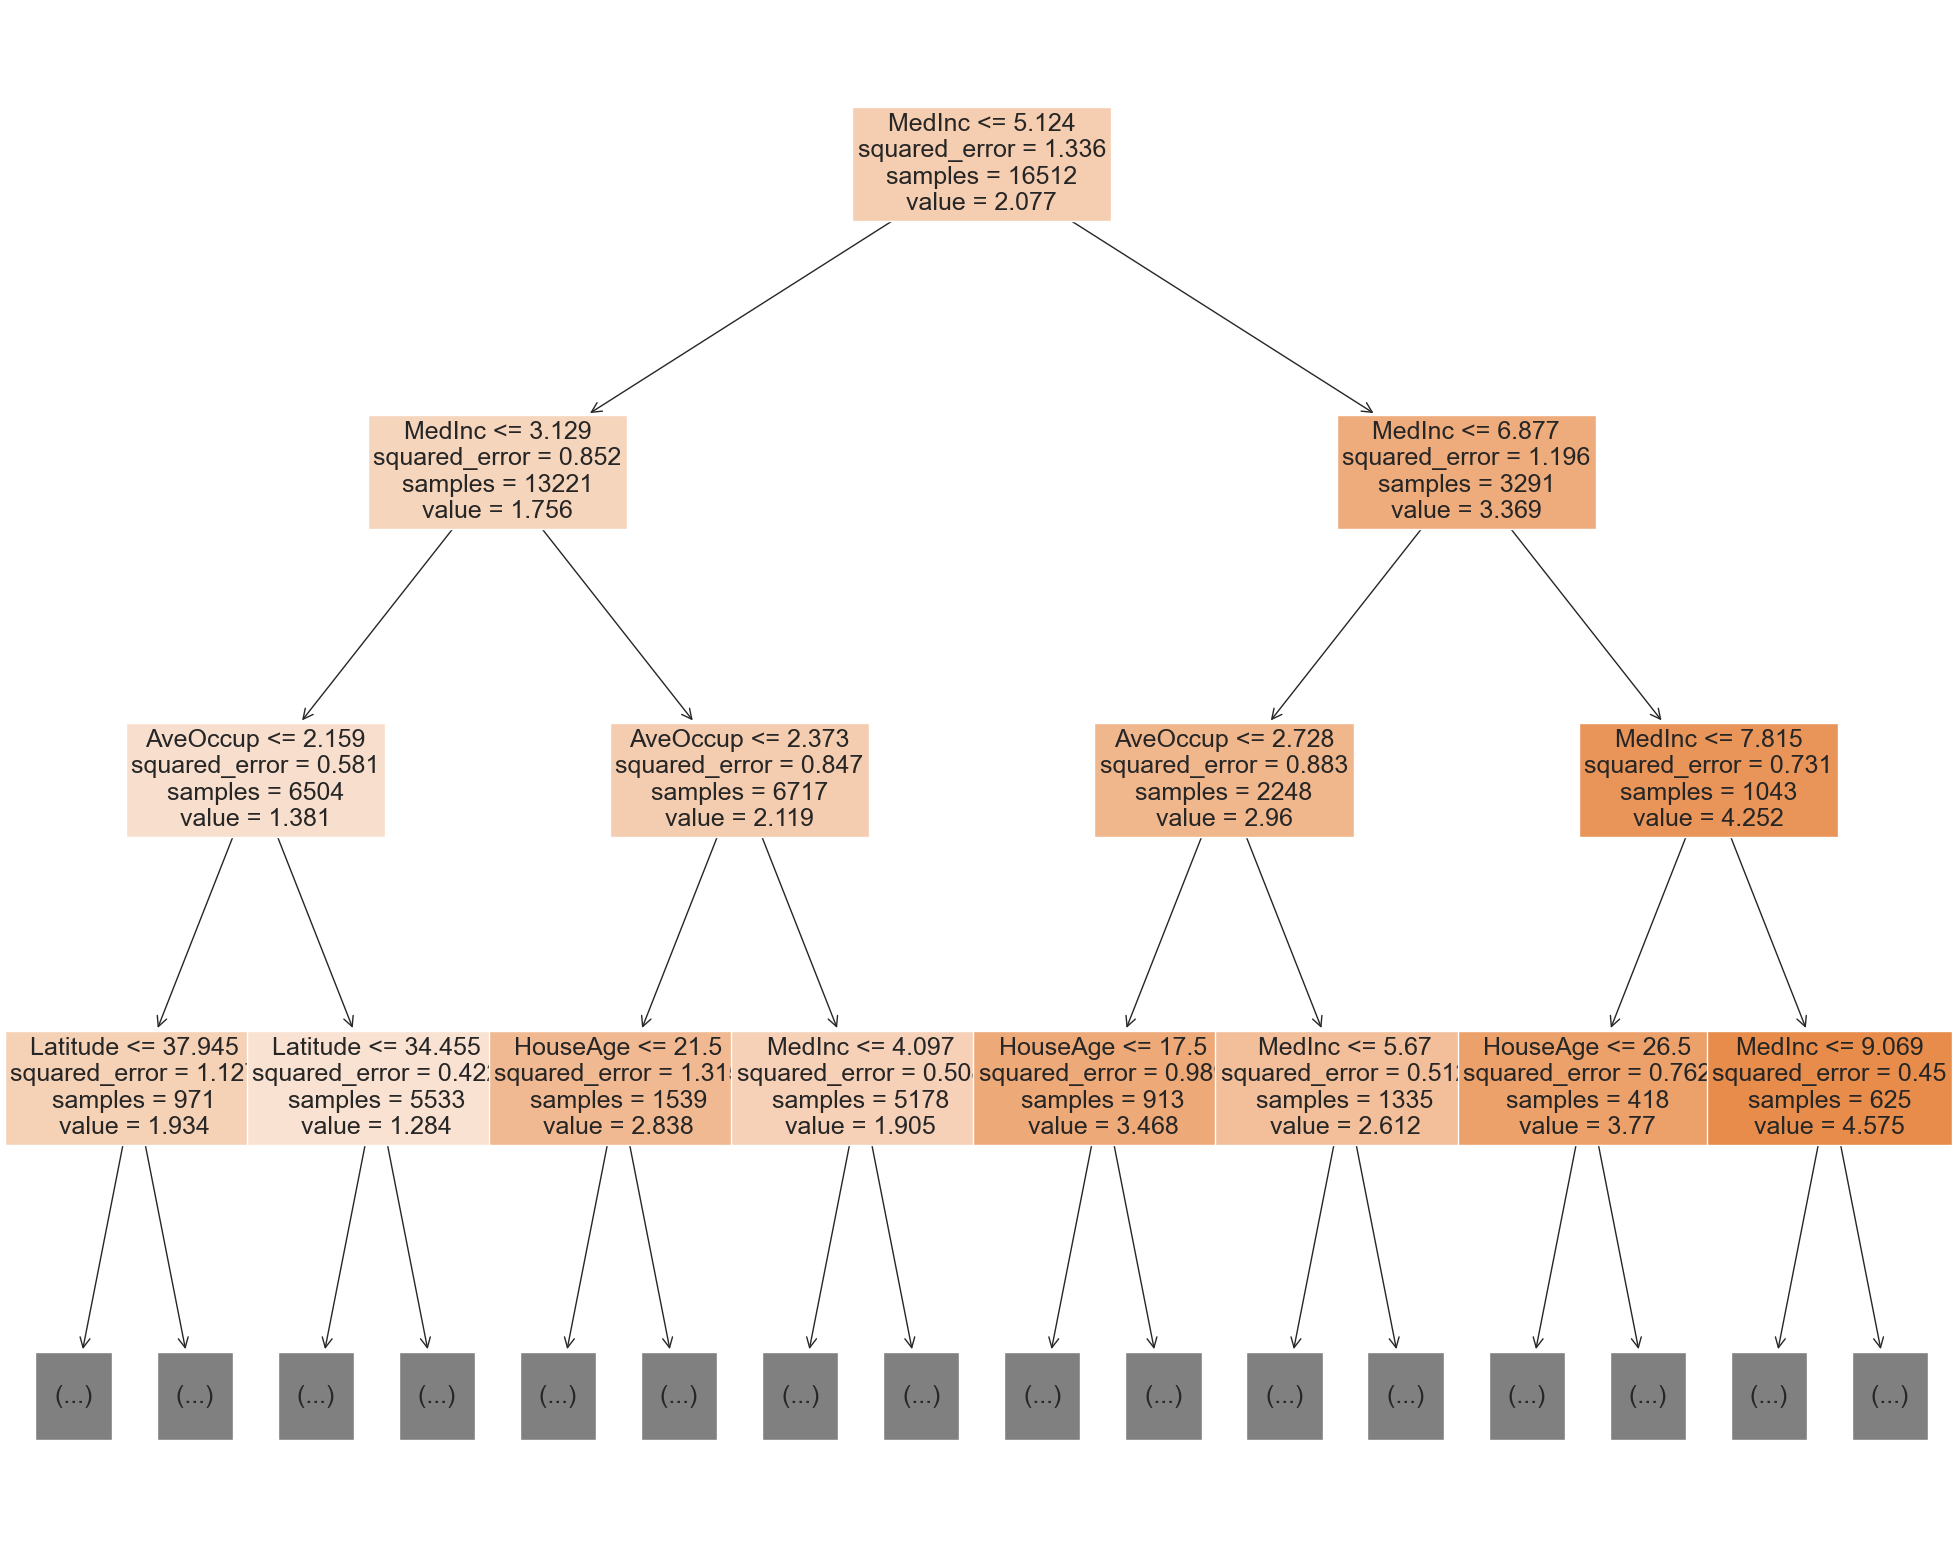

In [19]:
fig = plt.figure(figsize=(25,20))
plot_tree(model_dt,
            feature_names=data.columns,
            class_names=y,
            filled=True,
            fontsize=18,
            max_depth=3)

In [20]:
max_depth = 20
list_of_score = []
for i in range(1, max_depth):
    model_dt_tmp = DecisionTreeRegressor(random_state=1, max_depth=i)
    model_dt_tmp.fit(X_train, y_train)
    y_pred_dt = model_dt_tmp.predict(X_test)
    score = model_dt_tmp.score(X_test, y_test)
    list_of_score.append(score)
    print(f'Max depth = {i}', score)


Max depth = 1 0.29998055538680424
Max depth = 2 0.4446222538442387
Max depth = 3 0.5213660194943673
Max depth = 4 0.5704050986042712
Max depth = 5 0.6134879544159668
Max depth = 6 0.6542857202482536
Max depth = 7 0.6782249134902348
Max depth = 8 0.7096106510567972
Max depth = 9 0.7037754928403233
Max depth = 10 0.7033387265727145
Max depth = 11 0.6795870446340115
Max depth = 12 0.6750536922735397
Max depth = 13 0.6522318158421132
Max depth = 14 0.661239809321629
Max depth = 15 0.643355303175084
Max depth = 16 0.6353674808407608
Max depth = 17 0.6303369857103511
Max depth = 18 0.6241556962013113
Max depth = 19 0.6296150829710463


In [21]:
list_of_score.index(max(list_of_score))

7

In [22]:
list_of_score[7]

0.7096106510567972

In [23]:
min_samples_leaf = 80
list_of_score_leaf = []
for i in range(1, min_samples_leaf):
    model_dt_tmp = DecisionTreeRegressor(random_state=1, min_samples_leaf=i)
    model_dt_tmp.fit(X_train, y_train)
    y_pred_dt = model_dt_tmp.predict(X_test)
    score = model_dt_tmp.score(X_test, y_test)
    list_of_score_leaf.append(score)
    print(f'min samples leaf = {i}: ', score)

min samples leaf = 1:  0.617856045060232
min samples leaf = 2:  0.6320554475002842
min samples leaf = 3:  0.662215603180746
min samples leaf = 4:  0.6875832804974202
min samples leaf = 5:  0.6944685052410449
min samples leaf = 6:  0.7069003750839168
min samples leaf = 7:  0.7182481866671038
min samples leaf = 8:  0.7188405873167265
min samples leaf = 9:  0.7255441601462231
min samples leaf = 10:  0.7246401078282031
min samples leaf = 11:  0.729240193871255
min samples leaf = 12:  0.7325830389873313
min samples leaf = 13:  0.7364651968208858
min samples leaf = 14:  0.7346519249680528
min samples leaf = 15:  0.7391228870709925
min samples leaf = 16:  0.7378997305374666
min samples leaf = 17:  0.7361888760948871
min samples leaf = 18:  0.7388067731214225
min samples leaf = 19:  0.738144733712629
min samples leaf = 20:  0.7390901282811169
min samples leaf = 21:  0.7389746669115331
min samples leaf = 22:  0.7374207553453214
min samples leaf = 23:  0.7351821406766337
min samples leaf = 24:  

In [24]:
list_of_score_leaf.index(max(list_of_score_leaf))

14

In [25]:
list_of_score_leaf[14]

0.7391228870709925

In [26]:
model_dt_best = DecisionTreeRegressor(random_state=1, max_depth=7, min_samples_leaf=14)

In [27]:
model_dt_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=14, random_state=1)

In [28]:
y_pred = model_dt_best.predict(X_test)

In [29]:
model_dt_best.score(X_test, y_test)

0.6799699791545731

Визуализация с такими параметрами уже не будет такой красивой))

| Модель                                           | score | 
|--------------------------------------------------|-------|
| Linear regression                                | 0.596 |
| Decision tree                                    | 0.521 |   
| Decision tree (max_depth=7, min_samples_leaf=14) | 0.679 |

Линейная регрессия обычно быстро обучается, особенно на больших наборах данных, она подходит для задач с линейными зависимостями между признаками и целевой переменной.  
Деревья решений могут обучаться на разнообразных типах данных и моделировать сложные зависимости, не требуют предварительной нормализации данных, легче визуализировать. 